<a href="https://colab.research.google.com/github/jainPrabhanshu/ComputerVisionIITD/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

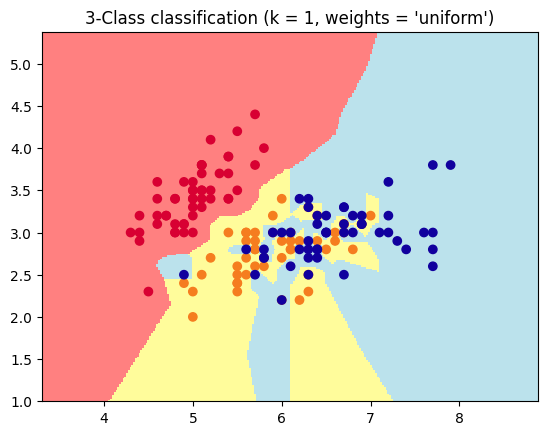

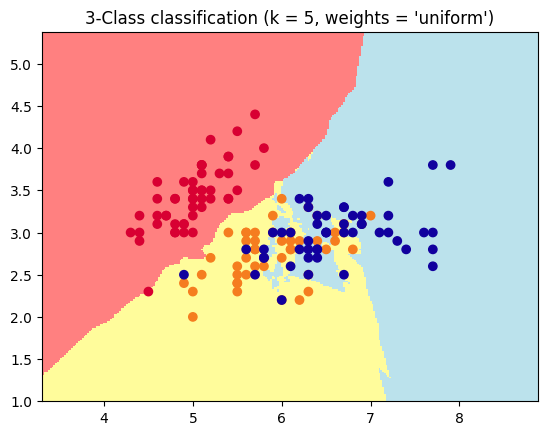

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from math import sqrt

def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

def get_neighbors(train, test_row, num_neighbors):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
  neighbors = list()
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors

def predict_classification(train, test_row, num_neighbors):
 neighbors = get_neighbors(train, test_row, num_neighbors)
 output_values = [row[-1] for row in neighbors]
 prediction = max(set(output_values), key=output_values.count)
 return prediction

def k_nearest_neighbors(train, test, num_neighbors):
  predictions = list()
  for row in test:
    output = predict_classification(train, row, num_neighbors)
    predictions.append(output)
  return(predictions)

num_neighbors = [1,5]

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02

cmap_light = ListedColormap(['#FF8080', '#FFFC9B', '#BBE2EC'])
cmap_bold = ListedColormap(['#D80032', '#F57D1F', '#11009E'])

for i in num_neighbors:
  for weights in ['uniform']:
    clf = neighbors.KNeighborsClassifier(i, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (i, weights))

plt.show()